# Calculation of unlensed and lensed rate of detectable events 

## Detectable Unlensed events' rate in a year

In [1]:
import numpy as np
from ler import LeR

In [2]:
# check the input and output
# check of examples
LeR?

Init signature:
LeR(
    nsamples=1000,
    npool=4,
    z_min=0.0,
    z_max=10.0,
    batch_size=50000,
    snr_finder='gwsnr',
    **kwargs,
)
Docstring:      Class to calculate both the rates of lensed and unlensed events
Init docstring:
class for rate calculation
class initialization
Input parameters:
    npool: number of cores to use
    z_min: minimum redshift
    z_max: maximum redshift
    m_min: minimum mass of the binary binary black hole
    m_max: maximum mass of the binary binary black hole
    event_type: type of event, either "BBH" or "BNS"
    equal_mass: if True, the binary black holes will have equal masses
    snr_finder: if 'gwsnr', the SNR will be calculated using the gwsnr package
                if 'custom', the SNR will be calculated using a custom function
    kwargs: keyword arguments
Output parameters:
    None
File:           ~/phd/mypackages/ler/ler/ler.py
Type:           type
Subclasses:     

In [3]:
# initialization
# this also initializes the gwsnr (SNR calculator method)
ler = LeR()

Given: IMR waveform
psds not given. Choosing bilby's default psds
getting stored interpolator...
In case if you need regeneration of interpolator of the given gwsnr param, please delete this file, ./interpolator_pickle/halfSNR_dict_0.pickle


In [4]:
ler.unlensed_cbc_statistics?

Signature: ler.unlensed_cbc_statistics(nsamples=False, jsonfile=True, **kwargs)
Docstring:
function to generate unlensed GW source parameters
Intput Parameters:
    nsamples: number of samples
    snr_threshold: snr threshold of detection
    jsonfile: if True, store all gravitational waves source parameters in json file 
                (for all sources, detected and undetected)
    kwargs: if new paramteres are provided, it will be used for sampling source parameters
Output Parameters:
    unlensed_gw_params: dictionary of unlensed GW source parameters
File:      ~/phd/mypackages/ler/ler/ler.py
Type:      method

In [5]:
# sampling unlensed events
ler.unlensed_cbc_statistics(nsamples=100000);

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 2 batche(s)
Batch no. 0
sampling gw params...
calculating snrs...
Batch no. 1
sampling gw params...
calculating snrs...


In [6]:
# rates
ler.unlensed_rate();

already sampled gw_param found.
sample size will be taken as that gw_param, size= 100000
total unlensed rate with step function: 687.3265472484895
total unlensed rate with pdet function: 762.0631437293046


* remember that absolute value of of rate will inherit errors from the local merger rate
* what matters is the ratio of unlensed and lensed events

In [7]:
# looking at the detectable events
ler.gw_param_detectable.keys()

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'opt_snr_net', 'L1', 'H1', 'V1', 'pdet_net'])

* both detectable and undetectable events are saved as json file in the current folder

## Detectable lensed events' rate in a year

In [8]:
ler.lensed_cbc_statistics?

Signature: ler.lensed_cbc_statistics(nsamples=False, jsonfile=True, **kwargs)
Docstring:
function to generate lensed GW source parameters, lens parameters and image parameters
Intput Parameters:
    nsamples: number of samples
    snr_threshold: threshold for detection signal to noise ratio
    jsonfile: if True, store lensed GW source parameters, lens parameters and image parameters in json file
                (both for detected and undetected sources)
    **kwargs: if new parameters are provided, it will be used for sampling
Output Parameters:
    lensed_param: dictionary of lensed GW source parameters, lens parameters and image parameters
File:      ~/phd/mypackages/ler/ler/ler.py
Type:      method

In [10]:
# sampling lens parameters and image(s) parameters
ler.batch_size = 25000
ler.lensed_cbc_statistics(nsamples=100000);

chosen batch size = 25000. If you want to change batch size, self.batch_size = new_size
There will be 4 batche(s)
Batch no. 0
sampling PEMD lens galaxy (with external shear) parameters...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:15<00:00, 1588.02it/s]


calculating snrs...
Batch no. 1
sampling PEMD lens galaxy (with external shear) parameters...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:14<00:00, 1688.55it/s]


calculating snrs...
Batch no. 2
sampling PEMD lens galaxy (with external shear) parameters...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:15<00:00, 1569.07it/s]


calculating snrs...
Batch no. 3
sampling PEMD lens galaxy (with external shear) parameters...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:15<00:00, 1656.54it/s]


calculating snrs...


In [12]:
# lensed rates
ler.lensed_rate();

already sampled lensed_param found.
sample size will be taken as that lensed_param, size= 100000
total unlensed rate with step function: 0.528405138731426
total unlensed rate with pdet function: 0.5295777885233685


In [13]:
# looking at the detectable events
ler.lensed_param_detectable.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'e1', 'e2', 'gamma1', 'gamma2', 'Dl', 'Ds', 'Dls', 'theta_E', 'gamma', 'mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'traces', 'determinants', 'image_type', 'weights', 'opt_snr_net', 'L1', 'H1', 'V1', 'pdet_net'])

* both detectable and undetectable events are saved as json file in the current folder

### Comparision

In [14]:
ler.rate_comparision();

already sampled gw_param found.
sample size will be taken as that gw_param, size= 100000
total unlensed rate with step function: 687.3265472484895
total unlensed rate with pdet function: 762.0631437293046
already sampled lensed_param found.
sample size will be taken as that lensed_param, size= 100000
total unlensed rate with step function: 0.528405138731426
total unlensed rate with pdet function: 0.5295777885233685
unlensed/lensed rate ratio =  (1300.7567430146416, 1439.0013332209028)


## Getting the parameters from the stored json files

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [24]:
# detectable unlensed events
f = open ('gw_params_detectable.json', "r")
data = json.loads(f.read())

data.keys()

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'opt_snr_net', 'L1', 'H1', 'V1', 'pdet_net'])

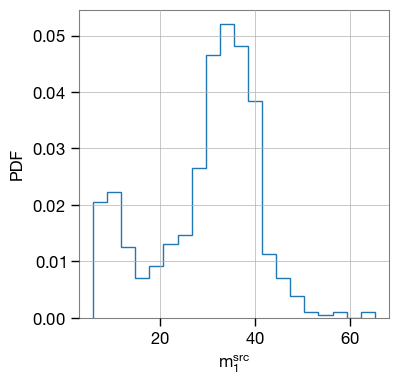

In [25]:
plt.hist(data['mass_1_source'], histtype='step', density=True, bins=20)
plt.xlabel(r'$m_1^{src}$')
plt.ylabel('PDF')
plt.show()

In [26]:
# detectable lensed events
f = open ('lensed_params_detectable.json', "r")
data = json.loads(f.read())

data.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'e1', 'e2', 'gamma1', 'gamma2', 'Dl', 'Ds', 'Dls', 'theta_E', 'gamma', 'mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'traces', 'determinants', 'image_type', 'weights', 'opt_snr_net', 'L1', 'H1', 'V1', 'pdet_net'])

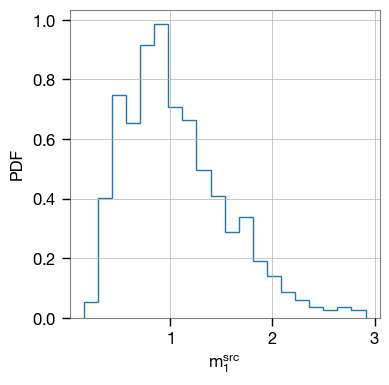

In [27]:
plt.hist(np.log10(np.array(data['magnifications']).flatten()), histtype='step', density=True, bins=20)
plt.xlabel(r'$m_1^{src}$')
plt.ylabel('PDF')
plt.show()